# Business Understanding

A concrete column is a vertical or inclined compression member used for transferring superstructure load to the foundation.

Increasing the lifespan of a concrete column involves various measures that can improve its durability and resistance to degradation over time. Some of the factors to be consider to find the compressive strength of concrete column.

Concrete is the most important material in civil engineering. The concrete compressive strength is a highly nonlinear function of age and ingredients. These ingredients include cement, blast furnace slag, fly ash, water, superplasticizer, coarse aggregate, and fine aggregate.

## Importing  Libraries 

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
sc=StandardScaler()
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
from scipy.stats import chi2_contingency
from sklearn.svm import SVR
svr = SVR()
from sklearn.metrics import accuracy_score,classification_report, precision_score, recall_score, f1_score,confusion_matrix,mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
dc = DecisionTreeRegressor()
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
rf=RandomForestClassifier()
from sklearn.svm import SVR
svr = SVR()
import pickle

## Loading Data

In [3]:
df = pd.read_csv("Concrete_Data.csv")

In [4]:
df.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [5]:
df.tail()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77
1029,260.9,100.5,78.3,200.6,8.6,864.5,761.5,28,32.40


## Column Descriptions

**Cement** = Quantity of cement used.

**Slag** = Byproduct of steel industry.

**Flyash** = Byproduct of coal combustion.

**Water** = Water added.

**Superplasticizer** = Chemical admixture used in concrete to improve its workability.

**Coarseaggregate** = Made up of various sizes of crushed stone.

**Fineaggregate** = It is responsible for filling the voids between the larger coarse aggregate particles and binding them together.

**Age** = Age of columns.

## Data Dimension 

In [6]:
print('Number of Rows: {}'.format(df.shape[0]))
print('Number of Cols: {}'.format(df.shape[1]))

Number of Rows: 1030
Number of Cols: 9


## Data Types and Structure


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cement            1030 non-null   float64
 1   slag              1030 non-null   float64
 2   flyash            1030 non-null   float64
 3   water             1030 non-null   float64
 4   superplasticizer  1030 non-null   float64
 5   coarseaggregate   1030 non-null   float64
 6   fineaggregate     1030 non-null   float64
 7   age               1030 non-null   int64  
 8   csMPa             1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


## Check NA 

In [8]:
df.isna().sum()

cement              0
slag                0
flyash              0
water               0
superplasticizer    0
coarseaggregate     0
fineaggregate       0
age                 0
csMPa               0
dtype: int64

## Numerical Attributes

In [9]:
df.describe()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


## Frequency Distribution

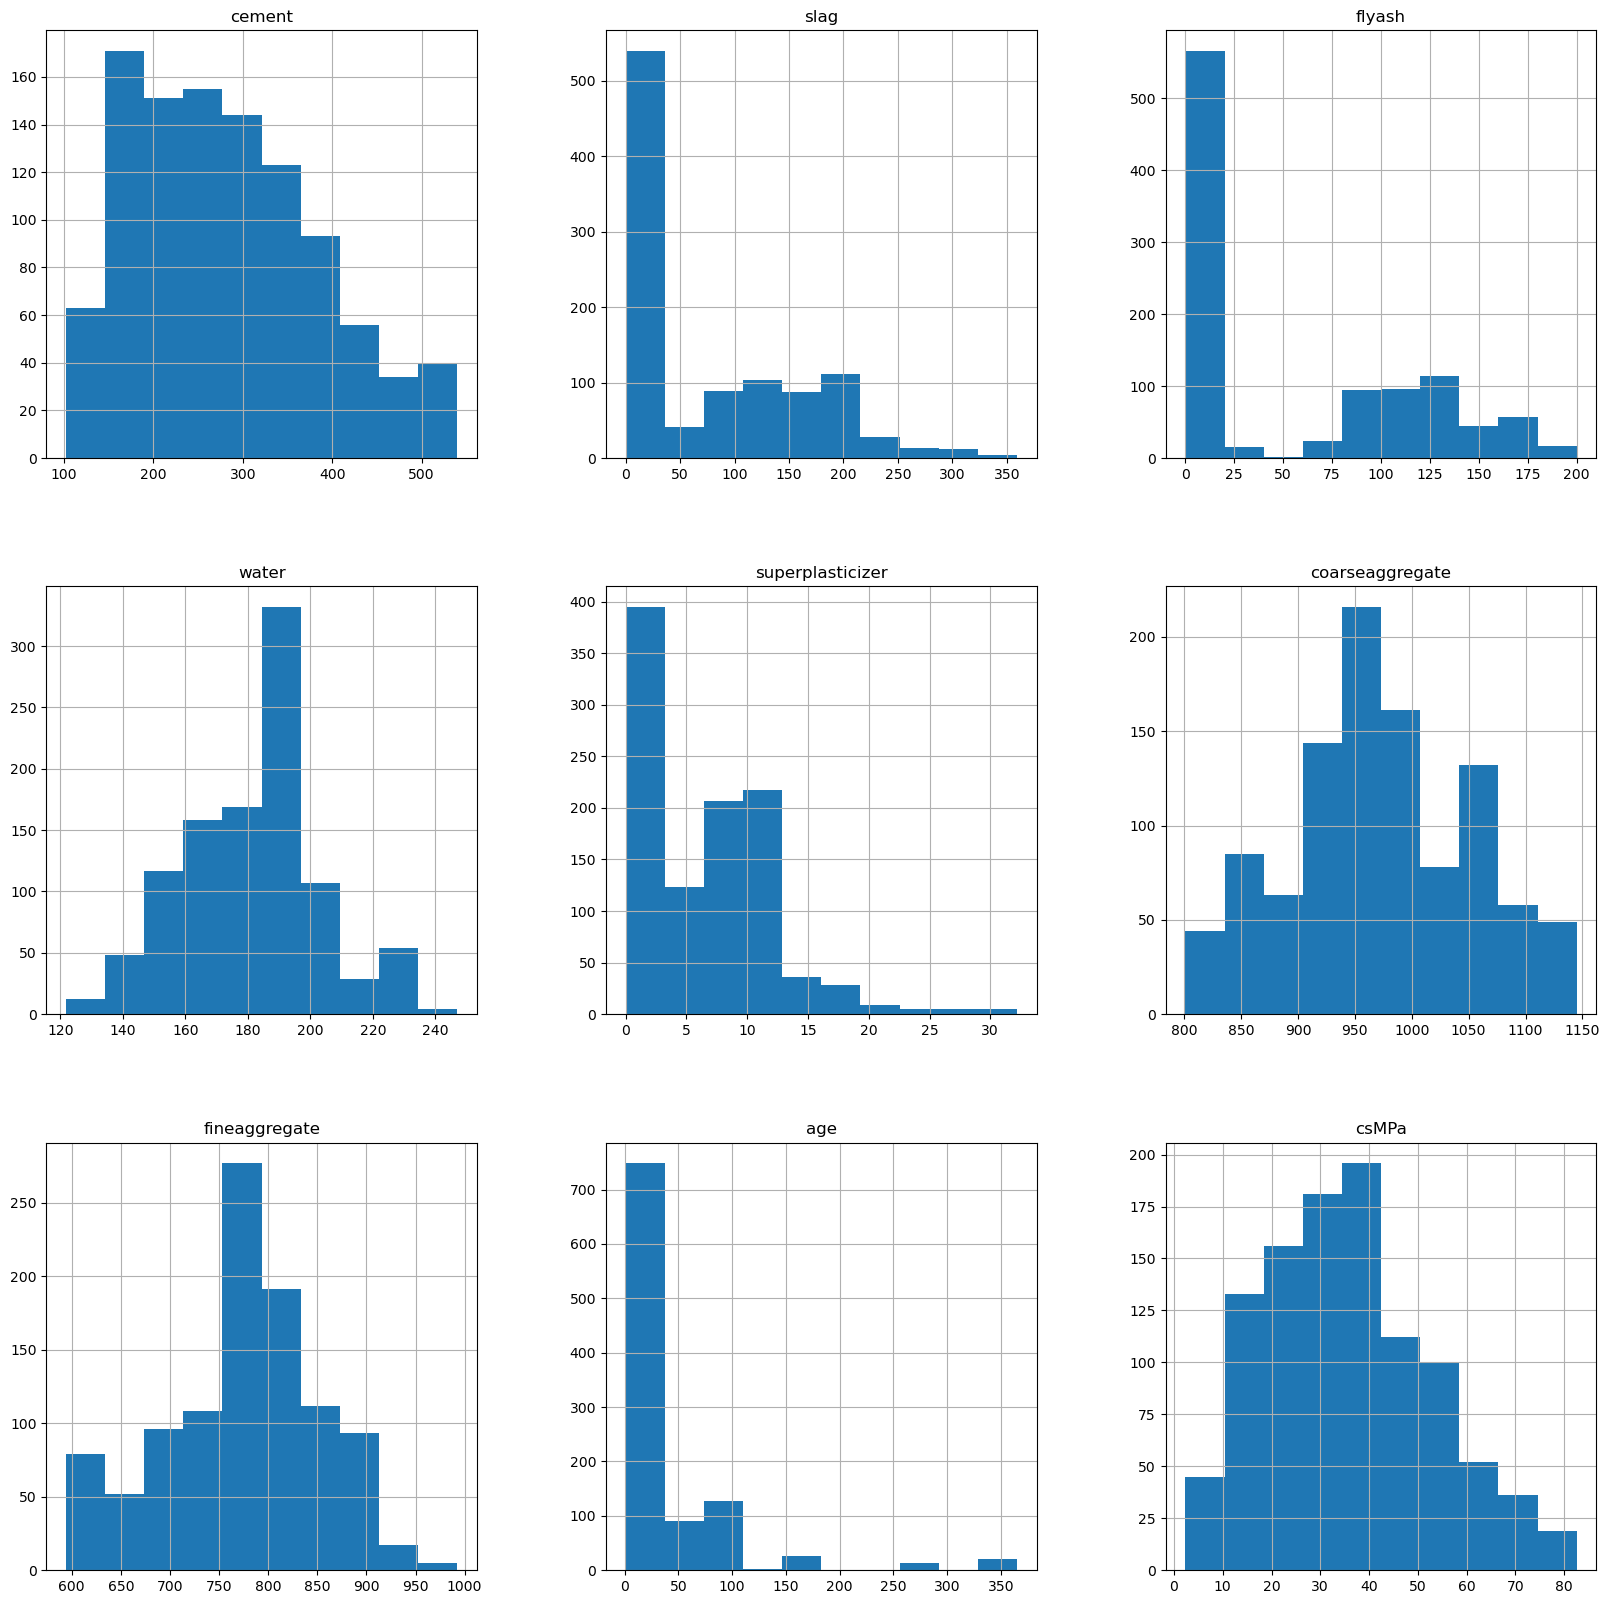

In [10]:
df.hist(figsize = (20,20))
plt.show()

* The frequency distribution graph clearly indicates the **presence of outliers in slag, superplasticizer, and age.**
* The **IQR (Interquartile Range) method** is employed **for the removal of outliers.**

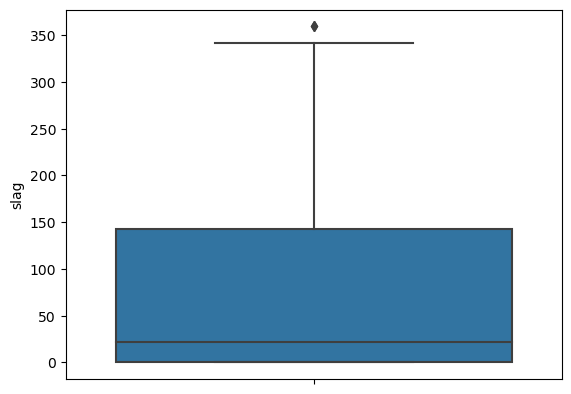

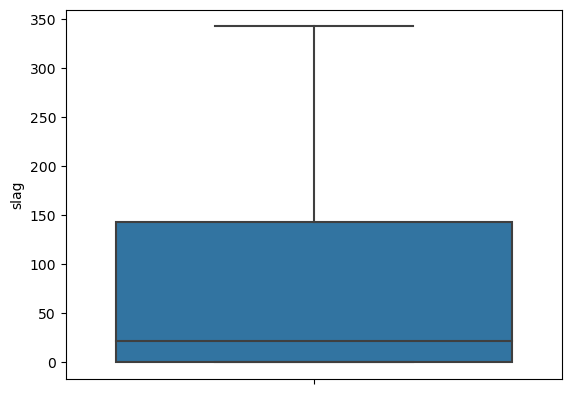

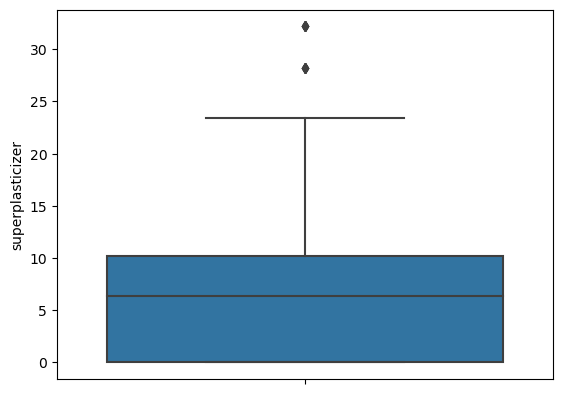

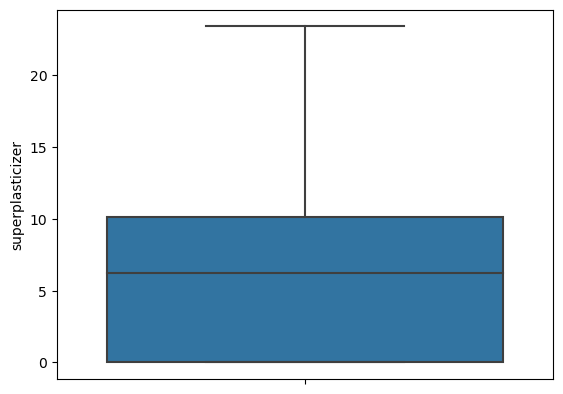

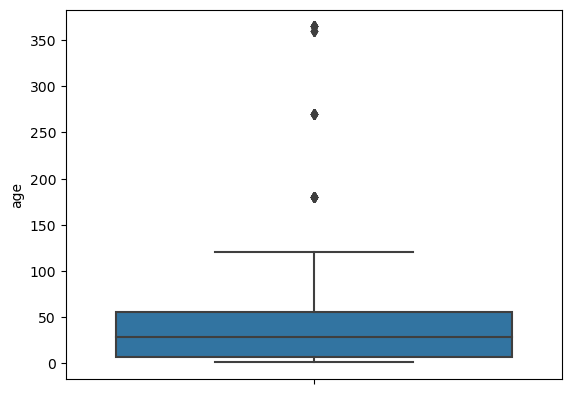

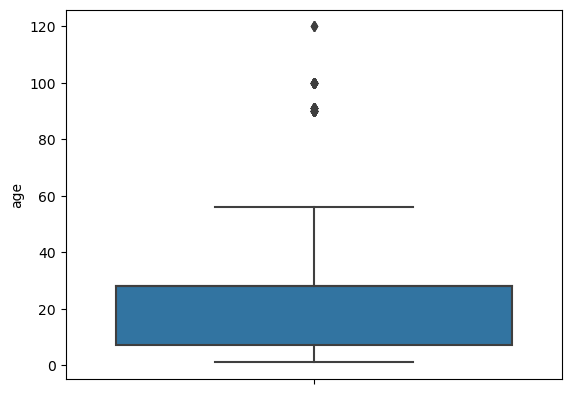

In [11]:
colm=["slag","superplasticizer","age"]
for c in colm:
  plt.figure()
  sns.boxplot(y=c,data=df)
  percentile25=df[c].quantile(0.25)
  percentile75=df[c].quantile(0.75)
  iqr=percentile75-percentile25
  upper_limit=percentile75+(1.5*iqr)
  lower_limit=percentile25-(1.5*iqr)
  df=df[(df[c]<=upper_limit) & (df[c]>=lower_limit)]
  plt.figure()
  sns.boxplot(y=c,data=df)

## Bi-Variable Analysis

In [12]:
correlations = df.corr()['csMPa'].drop('csMPa')
sorted_correlations = correlations.abs().sort_values(ascending=False)
sorted_correlations

age                 0.515942
cement              0.482249
superplasticizer    0.405834
water               0.355190
coarseaggregate     0.165989
slag                0.150107
fineaggregate       0.144697
flyash              0.073211
Name: csMPa, dtype: float64

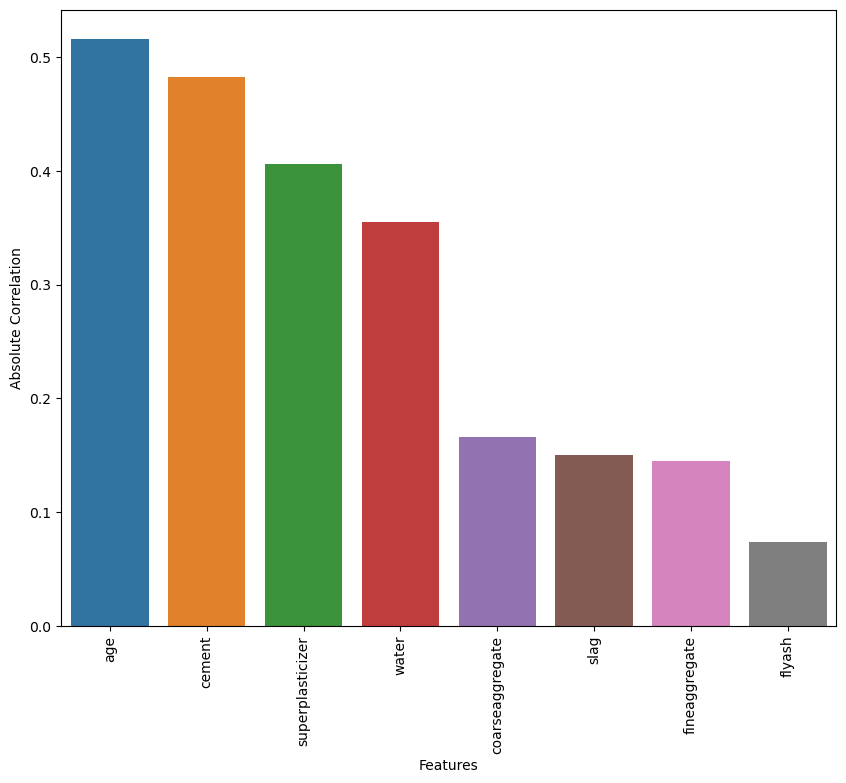

In [13]:
fig, ax = plt.subplots(figsize=(10,8))
sns.barplot(x=sorted_correlations.index, y=sorted_correlations,ax=ax)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Absolute Correlation')
plt.show()

* The graph demonstrates a **strong correlation between age and cement.**

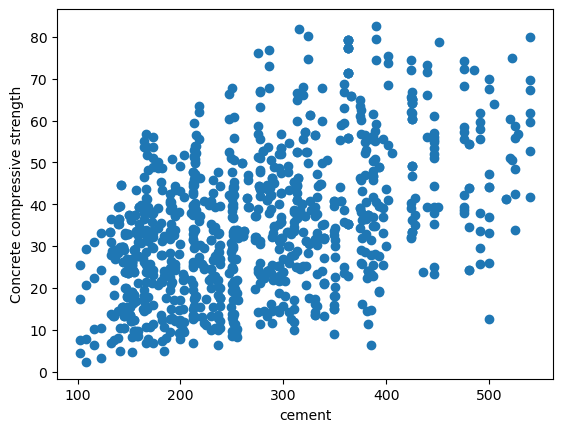

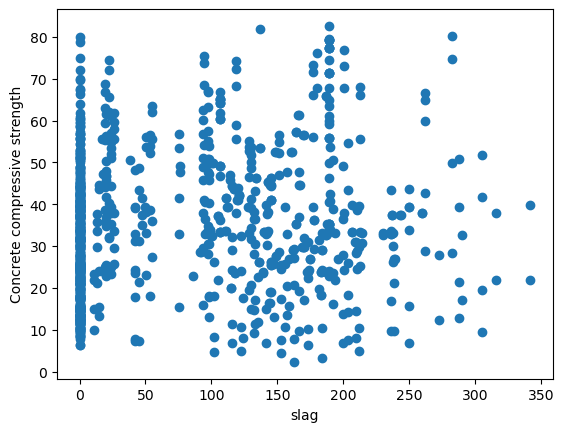

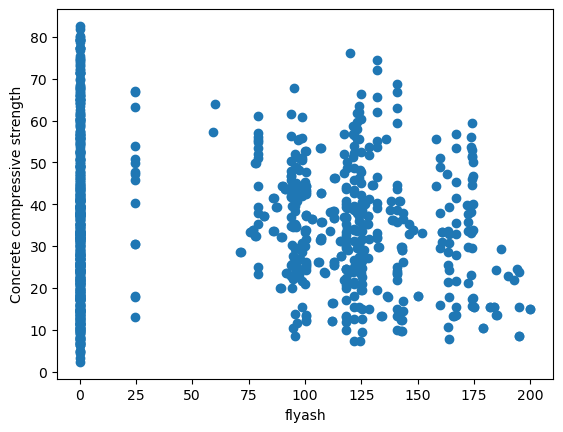

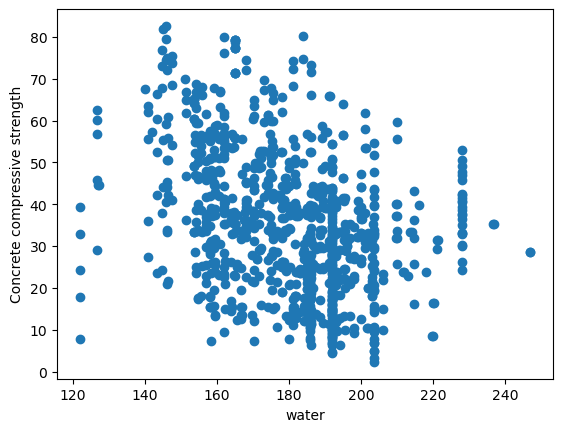

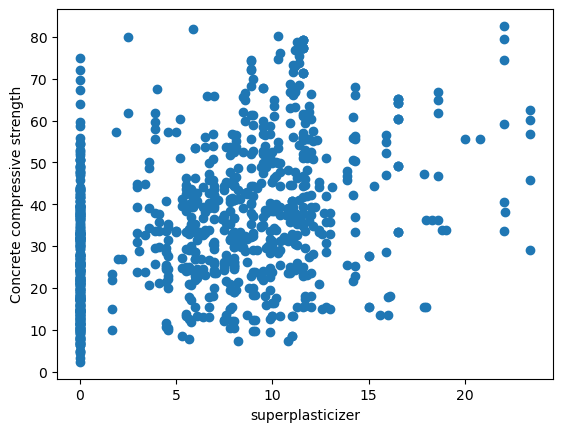

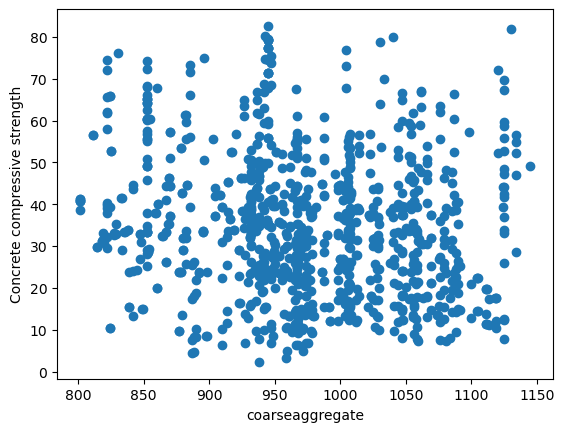

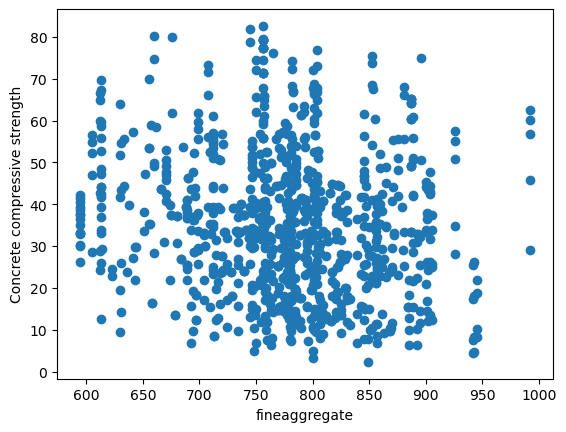

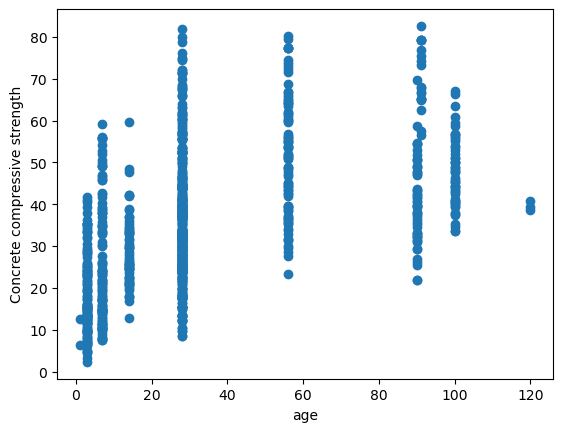

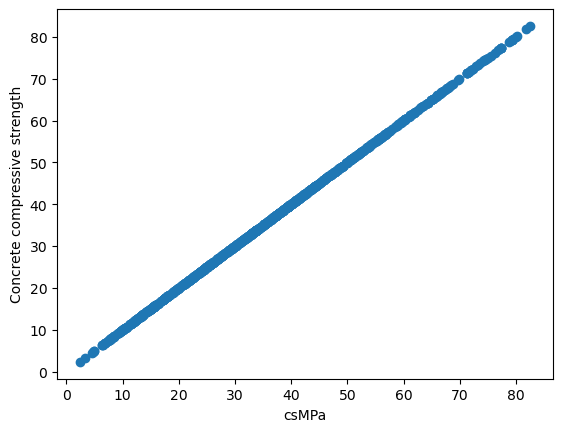

In [14]:
for i in df.columns:
    plt.scatter(df[i], df['csMPa'])
    plt.xlabel(i)
    plt.ylabel('Concrete compressive strength')
    plt.show()

In [17]:
df1 = pd.crosstab(df['age'], df['csMPa'])
chi2, p, dof, expected = chi2_contingency(df1)
print('Chi-square test statistic:', chi2)
print('p-value:', p)

Chi-square test statistic: 7604.43271606481
p-value: 4.610271828048532e-05


# Data Preparation 

## Spliting into Train, Test Data

In [18]:
X=df.drop(columns=['csMPa'])
Y=df['csMPa']

In [19]:
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.3, random_state=1)

In [20]:
X_train=sc.fit_transform(X_train)

In [22]:
X_test=sc.transform(X_test)

c:\Users\jayde\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [23]:
reg.fit(X_train,Y_train)

LinearRegression()

In [24]:
Y_pred=reg.predict(X_test)

In [25]:
rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
print('Root Mean Squared Error    :', rmse)
msr = r2_score(Y_test, Y_pred)
print('Mean Squared Error    :',msr)

Root Mean Squared Error    : 20.509877537621215
Mean Squared Error    : -0.39562846480037384


# Decision Tree

In [26]:
dc.fit(X_train, Y_train)

DecisionTreeRegressor()

In [27]:
y_pred = dc.predict(X_test)

In [28]:
rmse = np.sqrt(mean_squared_error(Y_test, y_pred))
print('Root Mean Squared Error:', rmse)
msr = r2_score(Y_test, y_pred)
print('Mean Squared Error    :',msr)

Root Mean Squared Error: 23.35094373390268
Mean Squared Error    : -0.8090582828268023


# Random Forest

In [33]:
rf_model = RandomForestRegressor(n_estimators=100,random_state=0)

In [34]:
rf_model.fit(X_train, Y_train)

RandomForestRegressor(random_state=0)

In [35]:
y_pred=rf_model.predict(X_test)

In [36]:
rmse = np.sqrt(mean_squared_error(Y_test, y_pred))
print('Root Mean Squared Error:', rmse)
msr = r2_score(Y_test, y_pred)
print('Mean Squared Error    :',msr)

Root Mean Squared Error: 27.005588096907395
Mean Squared Error    : -1.4196411549606083


# Support Vector Machine (SVM)

In [37]:
svr.fit(X_train, Y_train)

SVR()

In [38]:
svr_pred = svr.predict(X_test)

In [39]:
svr_mse = mean_squared_error(Y_test, svr_pred)
svr_mae = mean_absolute_error(Y_test, svr_pred)
svr_r2 = r2_score(Y_test, svr_pred)
print("Support Vector Regression (SVR):")
print("Mean Squared Error: ", svr_mse)
print("Mean Absolute Error: ", svr_mae)
print("Root Mean Squared Error: ", svr_r2)


Support Vector Regression (SVR):
Mean Squared Error:  301.4999513584541
Mean Absolute Error:  14.160999596119991
Root Mean Squared Error:  -0.0003015241004344915


## Deploy Project

In [18]:
pickle.dump(reg,open('model.pkl',"wb"))
model=pickle.load(open('model.pkl','rb'))